# EDA Code

### Importing Data and Column Cleaning

In [1]:
import pandas as pd

In [2]:
def get_data(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url))
    return pd.concat(dfs)

# Three months of data from the summer of 2019; pre-pandemic.

week_nums = [190601, 190608, 190615, 190622, 190629, 190706, 190713, 190720, 190727, 190803, 190810, 190817, 190824]
turnstiles_df = get_data(week_nums)

In [3]:
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555


In [4]:
turnstiles_df.shape

(2688157, 11)

In [5]:
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [6]:
#Cleaning column names
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]
turnstiles_df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [7]:
turnstiles_df.DATE.unique()

array(['05/25/2019', '05/26/2019', '05/27/2019', '05/28/2019',
       '05/29/2019', '05/30/2019', '05/31/2019', '06/01/2019',
       '06/02/2019', '06/03/2019', '06/04/2019', '06/05/2019',
       '06/06/2019', '06/07/2019', '06/08/2019', '06/09/2019',
       '06/10/2019', '06/11/2019', '06/12/2019', '06/13/2019',
       '06/14/2019', '06/15/2019', '06/16/2019', '06/17/2019',
       '06/18/2019', '06/19/2019', '06/20/2019', '06/21/2019',
       '06/22/2019', '06/23/2019', '06/24/2019', '06/25/2019',
       '06/26/2019', '06/27/2019', '06/28/2019', '06/29/2019',
       '06/30/2019', '07/01/2019', '07/02/2019', '07/03/2019',
       '07/04/2019', '07/05/2019', '07/06/2019', '07/07/2019',
       '07/08/2019', '07/09/2019', '07/10/2019', '07/11/2019',
       '07/12/2019', '07/13/2019', '07/14/2019', '07/15/2019',
       '07/16/2019', '07/17/2019', '07/18/2019', '07/19/2019',
       '07/20/2019', '07/21/2019', '07/22/2019', '07/23/2019',
       '07/24/2019', '07/25/2019', '07/26/2019', '07/27

In [8]:
# 3 months of data
turnstiles_df.DATE.nunique()

91

---

### Creating Datetime series

In [9]:
import datetime

In [10]:
turnstiles_df["DATE_TIME"] = pd.to_datetime(turnstiles_df.DATE + " " + turnstiles_df.TIME)
turnstiles_df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411,2019-05-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415,2019-05-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443,2019-05-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500,2019-05-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555,2019-05-25 16:00:00


---

### Droping Duplicates

In [11]:
turnstiles_df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"]).ENTRIES.count().reset_index().sort_values("ENTRIES", ascending=False).head(10)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
66751,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 17:00:00,2
66754,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-13 05:00:00,2
66739,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-10 17:00:00,2
66752,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 21:00:00,2
637112,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-01 17:00:00,2
636012,N045,R187,01-00-00,81 ST-MUSEUM,2019-06-02 17:00:00,2
638437,N045,R187,01-06-01,81 ST-MUSEUM,2019-07-09 09:00:00,2
66753,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-13 01:00:00,2
637206,N045,R187,01-00-02,81 ST-MUSEUM,2019-06-17 09:00:00,2
66740,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-10 21:00:00,2


In [12]:
mask = ((turnstiles_df["C/A"] == "A034") & 
(turnstiles_df["UNIT"] == "R170") & 
(turnstiles_df["SCP"] == "03-05-03") & 
(turnstiles_df["STATION"] == "14 ST-UNION SQ") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 8, 12).date()))

turnstiles_df[mask]

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
5248,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,01:00:00,REGULAR,27246,22444,2019-08-12 01:00:00
5249,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,01:00:00,RECOVR AUD,26279,31672,2019-08-12 01:00:00
5250,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,05:00:00,REGULAR,27254,22461,2019-08-12 05:00:00
5251,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,05:00:00,RECOVR AUD,26285,31678,2019-08-12 05:00:00
5252,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,09:00:00,REGULAR,27341,22909,2019-08-12 09:00:00
5253,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,09:00:00,RECOVR AUD,26377,32034,2019-08-12 09:00:00
5254,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,13:00:00,REGULAR,27515,23478,2019-08-12 13:00:00
5255,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,13:00:00,RECOVR AUD,26600,32438,2019-08-12 13:00:00
5256,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,17:00:00,REGULAR,27816,23801,2019-08-12 17:00:00
5257,A034,R170,03-05-03,14 ST-UNION SQ,LNQR456W,BMT,08/12/2019,17:00:00,RECOVR AUD,26936,32639,2019-08-12 17:00:00


In [13]:
turnstiles_df.DESC.value_counts()

REGULAR       2676330
RECOVR AUD      11827
Name: DESC, dtype: int64

In [14]:
turnstiles_df.sort_values(["DESC", "C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=True)
turnstiles_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
530,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,06/05/2019,02:00:00,RECOVR AUD,3889977,6686922,2019-06-05 02:00:00
513,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,07/21/2019,10:00:00,RECOVR AUD,3953471,6800583,2019-07-21 10:00:00
574,A006,R079,00-00-01,5 AV/59 ST,NQRW,BMT,06/05/2019,02:00:00,RECOVR AUD,5052207,3118830,2019-06-05 02:00:00
561,A006,R079,00-00-01,5 AV/59 ST,NQRW,BMT,07/21/2019,10:00:00,RECOVR AUD,5112101,3155297,2019-07-21 10:00:00
618,A006,R079,00-00-02,5 AV/59 ST,NQRW,BMT,06/05/2019,02:00:00,RECOVR AUD,6169143,16448896,2019-06-05 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
205663,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2019,01:00:00,REGULAR,5554,386,2019-08-23 01:00:00
205664,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2019,05:00:00,REGULAR,5554,386,2019-08-23 05:00:00
205666,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2019,13:00:00,REGULAR,5554,386,2019-08-23 13:00:00
205667,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2019,17:00:00,REGULAR,5554,386,2019-08-23 17:00:00


In [15]:
no_duplicates = turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
no_duplicates

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
530,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,06/05/2019,02:00:00,RECOVR AUD,3889977,6686922,2019-06-05 02:00:00
513,A006,R079,00-00-00,5 AV/59 ST,NQRW,BMT,07/21/2019,10:00:00,RECOVR AUD,3953471,6800583,2019-07-21 10:00:00
574,A006,R079,00-00-01,5 AV/59 ST,NQRW,BMT,06/05/2019,02:00:00,RECOVR AUD,5052207,3118830,2019-06-05 02:00:00
561,A006,R079,00-00-01,5 AV/59 ST,NQRW,BMT,07/21/2019,10:00:00,RECOVR AUD,5112101,3155297,2019-07-21 10:00:00
618,A006,R079,00-00-02,5 AV/59 ST,NQRW,BMT,06/05/2019,02:00:00,RECOVR AUD,6169143,16448896,2019-06-05 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
205663,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2019,01:00:00,REGULAR,5554,386,2019-08-23 01:00:00
205664,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2019,05:00:00,REGULAR,5554,386,2019-08-23 05:00:00
205666,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2019,13:00:00,REGULAR,5554,386,2019-08-23 13:00:00
205667,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/23/2019,17:00:00,REGULAR,5554,386,2019-08-23 17:00:00


In [16]:
(no_duplicates
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-05-25 00:00:00,1
1792064,R138,R293,00-06-00,34 ST-PENN STA,2019-08-21 02:00:00,1
1792066,R138,R293,00-06-00,34 ST-PENN STA,2019-08-21 10:00:00,1
1792067,R138,R293,00-06-00,34 ST-PENN STA,2019-08-21 14:00:00,1
1792068,R138,R293,00-06-00,34 ST-PENN STA,2019-08-21 18:00:00,1


In [17]:
turnstiles = no_duplicates.copy()

In [18]:
turnstiles.sort_index(inplace=True)

In [19]:
turnstiles.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/10/2019,00:00:00,REGULAR,7163695,2424838,2019-08-10
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,00:00:00,REGULAR,7089463,2401758,2019-06-08
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/15/2019,00:00:00,REGULAR,7098729,2404647,2019-06-15
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,REGULAR,7107725,2407457,2019-06-22
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,REGULAR,7116734,2410183,2019-06-29


In [20]:
(turnstiles
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-05-25 00:00:00,1
1792064,R138,R293,00-06-00,34 ST-PENN STA,2019-08-21 02:00:00,1
1792066,R138,R293,00-06-00,34 ST-PENN STA,2019-08-21 10:00:00,1
1792067,R138,R293,00-06-00,34 ST-PENN STA,2019-08-21 14:00:00,1
1792068,R138,R293,00-06-00,34 ST-PENN STA,2019-08-21 18:00:00,1


---

### Computing Daily Entries

In [21]:
turnstiles = turnstiles.drop(["EXITS", "DESC"], axis=1, errors="ignore")


In [22]:
turnstiles[(turnstiles["C/A"] == "A011") & 
(turnstiles["UNIT"] == "R080") & 
(turnstiles["SCP"] == "01-00-00") & 
(turnstiles["STATION"] == "57 ST-7 AV") &
(turnstiles["DATE"] == "08/10/2019")]


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
1428,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,08/10/2019,00:00:00,282304,2019-08-10 00:00:00
1429,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,08/10/2019,04:00:00,282368,2019-08-10 04:00:00
1430,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,08/10/2019,08:00:00,282388,2019-08-10 08:00:00
1431,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,08/10/2019,12:00:00,282485,2019-08-10 12:00:00
1432,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,08/10/2019,16:00:00,282602,2019-08-10 16:00:00
1433,A011,R080,01-00-00,57 ST-7 AV,NQRW,BMT,08/10/2019,20:00:00,282807,2019-08-10 20:00:00


In [23]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"], as_index=False)
                        .ENTRIES.first())


In [24]:
turnstiles_daily.head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,05/25/2019,7071830
1,A002,R051,02-00-00,59 ST,05/26/2019,7072639
2,A002,R051,02-00-00,59 ST,05/27/2019,7073233
3,A002,R051,02-00-00,59 ST,05/28/2019,7073967
4,A002,R051,02-00-00,59 ST,05/29/2019,7075460


In [25]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))


<ipython-input-25-3a945374269e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [26]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,05/25/2019,7071830,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/26/2019,7072639,05/25/2019,7071830.0
2,A002,R051,02-00-00,59 ST,05/27/2019,7073233,05/26/2019,7072639.0
3,A002,R051,02-00-00,59 ST,05/28/2019,7073967,05/27/2019,7073233.0
4,A002,R051,02-00-00,59 ST,05/29/2019,7075460,05/28/2019,7073967.0


In [27]:
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [28]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1051,A002,R051,02-06-00,59 ST,07/14/2019,679,07/13/2019,258249.0
1979,A007,R079,01-05-01,5 AV/59 ST,08/05/2019,0,08/04/2019,1.0
3548,A011,R080,01-03-00,57 ST-7 AV,08/21/2019,885829355,08/20/2019,885829659.0
3549,A011,R080,01-03-00,57 ST-7 AV,08/22/2019,885828839,08/21/2019,885829355.0
3550,A011,R080,01-03-00,57 ST-7 AV,08/23/2019,885828245,08/22/2019,885828839.0


In [29]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A002  R051  02-06-00  59 ST               1
A007  R079  01-05-01  5 AV/59 ST          1
A011  R080  01-03-00  57 ST-7 AV          3
A025  R023  01-03-01  34 ST-HERALD SQ    90
A035  R170  00-00-01  14 ST-UNION SQ      1
                                         ..
R622  R123  00-00-00  FRANKLIN AV        90
R629  R065  00-00-01  ROCKAWAY AV         1
R645  R110  00-03-02  FLATBUSH AV-B.C     2
R646  R110  01-00-01  FLATBUSH AV-B.C    90
R730  R431  00-00-04  EASTCHSTER/DYRE    86
Length: 513, dtype: int64

In [30]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=100000)

679 258249.0
451 303204.0
990 3124900.0
525061 644203.0
824 3557655.0
459084 950300.0
458818 12876202.0
722868 458818.0
15 839675.0
77 185844.0
1376289 8706.0
459073 68448066.0
482 4317364.0
85 644569.0
2000091722 6897017.0
1638739 805417.0
138 290734.0
11 2029641496.0
16 13966891.0
342 245911.0
7 2997591.0
5327464 4320256.0
2997591 2487626.0
4320257 2920966.0
107 7245002.0
4050694 5902066.0
7246468 4050189.0
524298 5852785.0
458754 3774.0
589824 57021649.0
721 915984.0
7 448326.0
452022 7.0
10 139247.0
319 5420925.0
147 127207.0
128 148717.0
73 137796.0
721090 5343128.0
262 3407291.0
422 17135909.0
5572134 104607813.0
209 200889.0
459183 4526857.0
458752 117849318.0
1462 989392.0
2254 238251.0
304 4587522.0
1962917508 9137630.0
26 496223.0
10 966877.0
852357 668.0
0 1392269.0
65 3465913.0
393224 117441231.0
458766 679169.0
1828703710 9687851.0
137 4086508.0
352362040 1409610.0
393248 714471.0
80 2586370.0
524292 3878.0
80 3260287.0
55 211928.0
142 155072.0
7 520660.0
1487 4721413.0
14

In [31]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

In [32]:
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=100000)


679 258249.0
451 303204.0
990 3124900.0
525061 644203.0
824 3557655.0
459084 950300.0
458818 12876202.0
722868 458818.0
15 839675.0
77 185844.0
1376289 8706.0
459073 68448066.0
482 4317364.0
85 644569.0
2000091722 6897017.0
1638739 805417.0
138 290734.0
11 2029641496.0
16 13966891.0
342 245911.0
7 2997591.0
5327464 4320256.0
2997591 2487626.0
4320257 2920966.0
107 7245002.0
4050694 5902066.0
7246468 4050189.0
524298 5852785.0
458754 3774.0
589824 57021649.0
721 915984.0
7 448326.0
452022 7.0
10 139247.0
319 5420925.0
147 127207.0
128 148717.0
73 137796.0
721090 5343128.0
262 3407291.0
422 17135909.0
5572134 104607813.0
209 200889.0
459183 4526857.0
458752 117849318.0
1462 989392.0
2254 238251.0
304 4587522.0
1962917508 9137630.0
26 496223.0
10 966877.0
852357 668.0
0 1392269.0
65 3465913.0
393224 117441231.0
458766 679169.0
1828703710 9687851.0
137 4086508.0
352362040 1409610.0
393248 714471.0
80 2586370.0
524292 3878.0
80 3260287.0
55 211928.0
142 155072.0
7 520660.0
1487 4721413.0
14

In [33]:
turnstiles_daily.head()


,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/26/2019,7072639,05/25/2019,7071830.0,809.0
2,A002,R051,02-00-00,59 ST,05/27/2019,7073233,05/26/2019,7072639.0,594.0
3,A002,R051,02-00-00,59 ST,05/28/2019,7073967,05/27/2019,7073233.0,734.0
4,A002,R051,02-00-00,59 ST,05/29/2019,7075460,05/28/2019,7073967.0,1493.0
5,A002,R051,02-00-00,59 ST,05/30/2019,7076985,05/29/2019,7075460.0,1525.0


In [34]:
(turnstiles_daily[turnstiles_daily["DAILY_ENTRIES"] > 100000]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size().sort_values())

Series([], dtype: int64)

In [35]:
turnstiles_daily[(turnstiles_daily["C/A"] == "A002") & 
(turnstiles_daily["UNIT"] == "R051") & 
(turnstiles_daily["SCP"] == "02-06-00") & 
(turnstiles_daily["STATION"] == "59 ST") &
(turnstiles_daily["DATE"] == "07/14/2019")]

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1051,A002,R051,02-06-00,59 ST,07/14/2019,679,07/13/2019,258249.0,679.0


---

### Higher Level Groupings


In [36]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES
0,A002,R051,59 ST,05/26/2019,7359.0
1,A002,R051,59 ST,05/27/2019,5875.0
2,A002,R051,59 ST,05/28/2019,6137.0
3,A002,R051,59 ST,05/29/2019,13037.0
4,A002,R051,59 ST,05/30/2019,13544.0


In [37]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,05/26/2019,5854.0
1,1 AV,05/27/2019,4988.0
2,1 AV,05/28/2019,4679.0
3,1 AV,05/29/2019,17842.0
4,1 AV,05/30/2019,18811.0


In [38]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,12897505.0
1,GRD CNTRL-42 ST,11443886.0
2,34 ST-HERALD SQ,9734434.0
3,23 ST,8572428.0
4,42 ST-PORT AUTH,8285562.0


---

### Plotting Using Matplotlib

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/26/2019,7072639,05/25/2019,7071830.0,809.0
2,A002,R051,02-00-00,59 ST,05/27/2019,7073233,05/26/2019,7072639.0,594.0
3,A002,R051,02-00-00,59 ST,05/28/2019,7073967,05/27/2019,7073233.0,734.0
4,A002,R051,02-00-00,59 ST,05/29/2019,7075460,05/28/2019,7073967.0,1493.0
5,A002,R051,02-00-00,59 ST,05/30/2019,7076985,05/29/2019,7075460.0,1525.0


In [41]:
single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A002") & 
(turnstiles_daily["UNIT"] == "R051") & 
(turnstiles_daily["SCP"] == "02-00-00") & 
(turnstiles_daily["STATION"] == "59 ST")]

single_turnstile.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/26/2019,7072639,05/25/2019,7071830.0,809.0
2,A002,R051,02-00-00,59 ST,05/27/2019,7073233,05/26/2019,7072639.0,594.0
3,A002,R051,02-00-00,59 ST,05/28/2019,7073967,05/27/2019,7073233.0,734.0
4,A002,R051,02-00-00,59 ST,05/29/2019,7075460,05/28/2019,7073967.0,1493.0
5,A002,R051,02-00-00,59 ST,05/30/2019,7076985,05/29/2019,7075460.0,1525.0


Text(0.5, 1.0, 'Daily Entries for Turnstile A002/R051/02-00-00 at 59 ST Station')

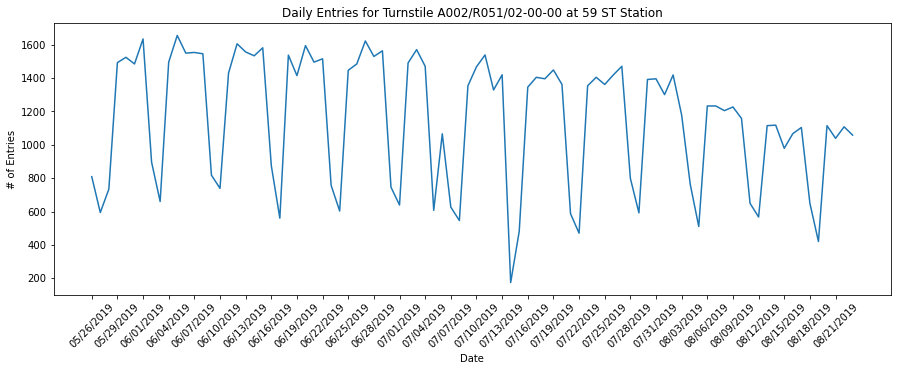

In [42]:
ax1 = single_turnstile['DATE']
ax2 = single_turnstile['DAILY_ENTRIES']

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ax1, ax2)
plt.ylabel('# of Entries')
plt.xlabel('Date')
ax.set_xticks(ax1[::3])
ax.set_xticklabels(ax1[::3], rotation=45)
plt.title('Daily Entries for Turnstile A002/R051/02-00-00 at 59 ST Station')

In [43]:
station_daily_union_sq = station_daily[station_daily['STATION'] == '14 ST-UNION SQ']
station_daily_union_sq.head()

,STATION,DATE,DAILY_ENTRIES
1260,14 ST-UNION SQ,05/26/2019,61108.0
1261,14 ST-UNION SQ,05/27/2019,50187.0
1262,14 ST-UNION SQ,05/28/2019,47257.0
1263,14 ST-UNION SQ,05/29/2019,97328.0
1264,14 ST-UNION SQ,05/30/2019,103436.0


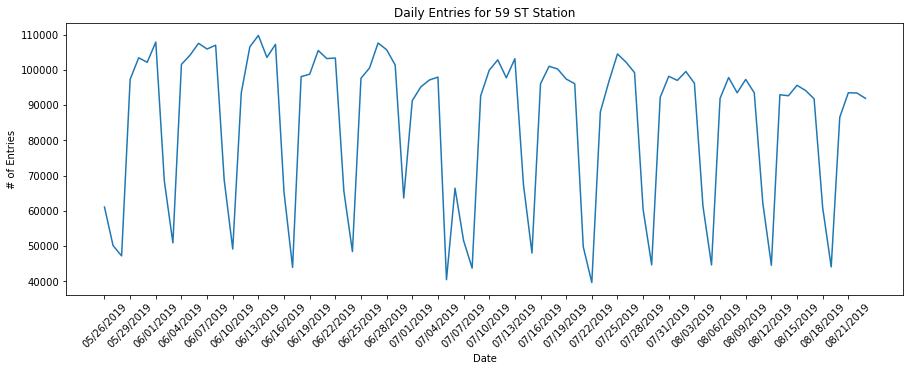

In [44]:
x2 = station_daily_union_sq['DATE']
y2 = station_daily_union_sq['DAILY_ENTRIES']

fig, ax = plt.subplots(figsize=(15,5))

ax.plot(x2, y2)
plt.ylabel('# of Entries')
plt.xlabel('Date')
ax.set_xticks(ax1[::3])
ax.set_xticklabels(ax1[::3], rotation=45)
plt.title('Daily Entries for 59 ST Station')

plt.savefig('59_st_time_series.jpg')

### Day of Week Counts for Many Weeks

In [45]:
import numpy as np

In [46]:
station_daily_union_sq['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_union_sq['DATE']).dt.dayofweek
station_daily_union_sq['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_union_sq['DATE']).dt.week
station_daily_union_sq.head()


<ipython-input-46-cfc136ae90c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_union_sq['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_union_sq['DATE']).dt.dayofweek
<ipython-input-46-cfc136ae90c7>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_union_sq['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_union_sq['DATE']).dt.week
<ipython-input-46-cfc136ae90c7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,STATION,DATE,DAILY_ENTRIES,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
1260,14 ST-UNION SQ,05/26/2019,61108.0,6,21
1261,14 ST-UNION SQ,05/27/2019,50187.0,0,22
1262,14 ST-UNION SQ,05/28/2019,47257.0,1,22
1263,14 ST-UNION SQ,05/29/2019,97328.0,2,22
1264,14 ST-UNION SQ,05/30/2019,103436.0,3,22


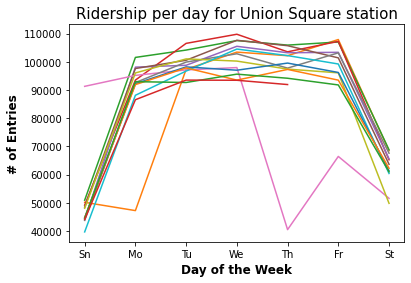

In [47]:
for i, group in station_daily_union_sq.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
plt.xlabel('Day of the Week', fontweight='bold', fontsize=12)
plt.ylabel('# of Entries', fontweight='bold', fontsize=12)
plt.xticks(np.arange(7),['Sn', 'Mo','Tu','We','Th','Fr','St'])
plt.title('Ridership per day for Union Square station', fontsize=15)

plt.savefig('weekly_riders_daily.jpg')

(array([279.,  65.,  13.,   8.,   5.,   2.,   3.,   1.,   1.,   1.]),
 array([8.59600000e+03, 1.29748690e+06, 2.58637780e+06, 3.87526870e+06,
        5.16415960e+06, 6.45305050e+06, 7.74194140e+06, 9.03083230e+06,
        1.03197232e+07, 1.16086141e+07, 1.28975050e+07]),
 <BarContainer object of 10 artists>)

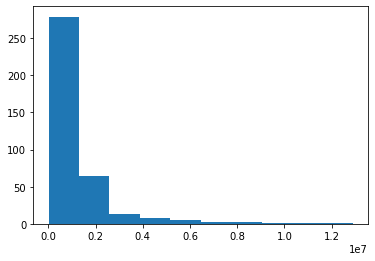

In [48]:
plt.hist(station_totals['DAILY_ENTRIES'])


In [49]:
station_totals = station_totals.sort_values('DAILY_ENTRIES', ascending=False)
station_totals.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,12897505.0
1,GRD CNTRL-42 ST,11443886.0
2,34 ST-HERALD SQ,9734434.0
3,23 ST,8572428.0
4,42 ST-PORT AUTH,8285562.0


AttributeError: 'BarContainer' object has no attribute 'title'

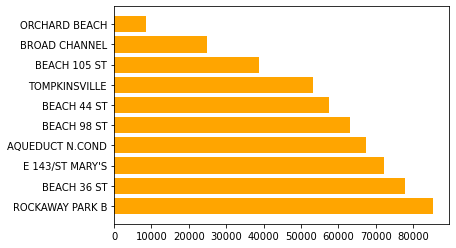

In [50]:
mpl_bar_stations = plt.barh(y=station_totals['STATION'][-10:], width=station_totals['DAILY_ENTRIES'][-10:], color='Orange')
mpl_bar_stations.title('Top 10 Highest Traffic Stations')



In [51]:
import seaborn as sns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-52-62526efa9e88>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  top_10_stations.set_xticklabels(labels=[0, '2 Million', '4 Million', '6 Million', '8 Million', '10 Million', '12 Million'], rotation=45)


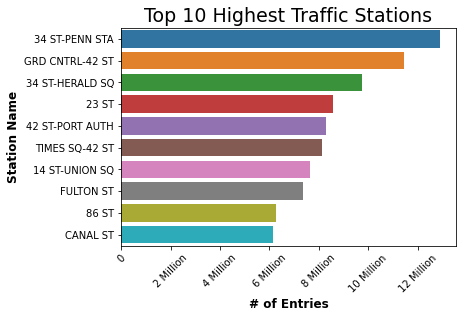

In [52]:
top_10_stations = sns.barplot(station_totals['DAILY_ENTRIES'][:10], station_totals['STATION'][:10], orient='h')
top_10_stations.set_title('Top 10 Highest Traffic Stations', fontsize=19)
top_10_stations.set_xlabel('# of Entries', fontsize=12, fontweight='bold')
top_10_stations.set_ylabel('Station Name', fontsize=12, fontweight='bold')
plt.ticklabel_format(style='plain', axis='x')
top_10_stations.set_xticklabels(labels=[0, '2 Million', '4 Million', '6 Million', '8 Million', '10 Million', '12 Million'], rotation=45)

plt.savefig('top_10_stations.jpg')


---

### Computing Time of Day Entry Data

In [53]:
turnstiles.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/10/2019,00:00:00,7163695,2019-08-10
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,00:00:00,7089463,2019-06-08
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/15/2019,00:00:00,7098729,2019-06-15
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,7107725,2019-06-22
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,7116734,2019-06-29


In [54]:
turnstiles['DAY_OF_WEEK'] = pd.to_datetime(turnstiles['DATE']).dt.dayofweek
turnstiles.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,DAY_OF_WEEK
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/10/2019,00:00:00,7163695,2019-08-10,5
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/08/2019,00:00:00,7089463,2019-06-08,5
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/15/2019,00:00:00,7098729,2019-06-15,5
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/22/2019,00:00:00,7107725,2019-06-22,5
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/29/2019,00:00:00,7116734,2019-06-29,5


In [55]:
turnstiles_hourly = (turnstiles
                        .groupby(['C/A', 'UNIT', 'SCP', "STATION", "DATE", "TIME"], as_index=False)
                        .ENTRIES.first())
turnstiles_hourly.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,05/25/2019,00:00:00,7071830
1,A002,R051,02-00-00,59 ST,05/25/2019,04:00:00,7071844
2,A002,R051,02-00-00,59 ST,05/25/2019,08:00:00,7071864
3,A002,R051,02-00-00,59 ST,05/25/2019,12:00:00,7071943
4,A002,R051,02-00-00,59 ST,05/25/2019,16:00:00,7072182


In [56]:
turnstiles_hourly[['PREV_TIME', 'PREV_ENTRIES']] = (turnstiles_hourly
                                                    .groupby(["C/A", "UNIT", "SCP", "STATION"])["TIME", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))


<ipython-input-56-10d451cd3e36>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_hourly[['PREV_TIME', 'PREV_ENTRIES']] = (turnstiles_hourly


In [57]:
turnstiles_hourly.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_TIME,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,05/25/2019,00:00:00,7071830,NaN,NaN
1,A002,R051,02-00-00,59 ST,05/25/2019,04:00:00,7071844,00:00:00,7071830.0
2,A002,R051,02-00-00,59 ST,05/25/2019,08:00:00,7071864,04:00:00,7071844.0
3,A002,R051,02-00-00,59 ST,05/25/2019,12:00:00,7071943,08:00:00,7071864.0
4,A002,R051,02-00-00,59 ST,05/25/2019,16:00:00,7072182,12:00:00,7071943.0


In [58]:
turnstiles_hourly.dropna(subset=["PREV_TIME"], axis=0, inplace=True)

In [59]:
turnstiles_hourly[turnstiles_hourly['ENTRIES'] < turnstiles_hourly['PREV_ENTRIES']].head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_TIME,PREV_ENTRIES
6280,A002,R051,02-06-00,59 ST,07/13/2019,12:00:00,113,04:00:00,258249.0
12127,A007,R079,01-05-01,5 AV/59 ST,08/05/2019,14:00:00,0,22:00:00,1.0
21693,A011,R080,01-03-00,57 ST-7 AV,08/20/2019,16:00:00,885829605,12:00:00,885829659.0
21694,A011,R080,01-03-00,57 ST-7 AV,08/20/2019,20:00:00,885829427,16:00:00,885829605.0
21695,A011,R080,01-03-00,57 ST-7 AV,08/21/2019,00:00:00,885829355,20:00:00,885829427.0


In [60]:
(turnstiles_hourly[turnstiles_hourly["ENTRIES"] < turnstiles_hourly["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A002  R051  02-06-00  59 ST                1
A007  R079  01-05-01  5 AV/59 ST           1
A011  R080  01-03-00  57 ST-7 AV          20
A025  R023  01-03-01  34 ST-HERALD SQ    552
A034  R170  03-05-03  14 ST-UNION SQ       1
                                        ... 
R636  R209  00-00-01  STERLING ST          1
            00-00-02  STERLING ST          1
R645  R110  00-03-02  FLATBUSH AV-B.C      2
R646  R110  01-00-01  FLATBUSH AV-B.C    518
R730  R431  00-00-04  EASTCHSTER/DYRE    503
Length: 576, dtype: int64

In [61]:
turnstiles_hourly["HOURLY_ENTRIES"] = turnstiles_hourly.apply(get_daily_counts, axis=1, max_counter=4000)

113 258249.0
28077 23744.0
20 303254.0
617 3125272.0
525061 644203.0
102 3557655.0
458941 950479.0
458818 12876993.0
721471 458883.0
5765174 5760032.0
4385344 4380798.0
6485189 6479211.0
15 839675.0
8 185904.0
1376270 8706.0
458778 68448134.0
103 40911.0
194 4317416.0
0 644574.0
2000093069 6897017.0
1638404 805417.0
138 290734.0
8975399 8968425.0
2029712669 2029716783.0
11 2029641260.0
16 13967417.0
342 247597.0
7 2997591.0
5327464 4320256.0
2997591 2487626.0
4320257 2920966.0
903858 899053.0
91 51815.0
1306149 1301531.0
107 7246254.0
4050694 5903657.0
7246468 4050664.0
524298 5853002.0
458754 3774.0
589824 57022793.0
135 916119.0
7 450469.0
450995 7.0
10 139247.0
458774 558253.0
23 5421265.0
147 127761.0
12 11822.0
5 149777.0
21659 16452.0
73 137941.0
4 4183.0
49 21339.0
720933 5343634.0
190 3407814.0
241 17136678.0
7 51904.0
76 11769.0
15 23110.0
5570789 104608160.0
209 201981.0
458856 4526857.0
458752 117849318.0
155 990137.0
22 238251.0
304 4588920.0
1962917910 9137630.0
26 497472.

In [62]:
turnstiles_hourly.head()

,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,PREV_TIME,PREV_ENTRIES,HOURLY_ENTRIES
1,A002,R051,02-00-00,59 ST,05/25/2019,04:00:00,7071844,00:00:00,7071830.0,14.0
2,A002,R051,02-00-00,59 ST,05/25/2019,08:00:00,7071864,04:00:00,7071844.0,20.0
3,A002,R051,02-00-00,59 ST,05/25/2019,12:00:00,7071943,08:00:00,7071864.0,79.0
4,A002,R051,02-00-00,59 ST,05/25/2019,16:00:00,7072182,12:00:00,7071943.0,239.0
5,A002,R051,02-00-00,59 ST,05/25/2019,20:00:00,7072456,16:00:00,7072182.0,274.0


In [63]:
stations_hourly = turnstiles_hourly.groupby(['STATION', 'DATE', 'TIME']).HOURLY_ENTRIES.sum().reset_index()
stations_hourly.head()

,STATION,DATE,TIME,HOURLY_ENTRIES
0,1 AV,05/25/2019,04:00:00,504.0
1,1 AV,05/25/2019,08:00:00,198.0
2,1 AV,05/25/2019,12:00:00,675.0
3,1 AV,05/25/2019,16:00:00,1523.0
4,1 AV,05/25/2019,20:00:00,1650.0


In [64]:
stations_hourly_clean = stations_hourly[stations_hourly['TIME'].isin(['00:00:00', '04:00:00', '08:00:00', '12:00:00', '16:00:00', '20:00:00'])]

stations_hourly_clean

,STATION,DATE,TIME,HOURLY_ENTRIES
0,1 AV,05/25/2019,04:00:00,504.0
1,1 AV,05/25/2019,08:00:00,198.0
2,1 AV,05/25/2019,12:00:00,675.0
3,1 AV,05/25/2019,16:00:00,1523.0
4,1 AV,05/25/2019,20:00:00,1650.0
...,...,...,...,...
393296,WORLD TRADE CTR,08/23/2019,04:00:00,34.0
393297,WORLD TRADE CTR,08/23/2019,08:00:00,973.0
393298,WORLD TRADE CTR,08/23/2019,12:00:00,2869.0
393299,WORLD TRADE CTR,08/23/2019,16:00:00,4301.0


In [95]:
stations_hourly_clean['STATION'].unique()

array(['1 AV', '103 ST-CORONA', '104 ST', '110 ST', '111 ST', '121 ST',
       '125 ST', '135 ST', '138/GRAND CONC', '14 ST', '145 ST',
       '149/GRAND CONC', '167 ST', '168 ST', '169 ST', '170 ST',
       '174-175 STS', '175 ST', '176 ST', '18 AV', '18 ST', '181 ST',
       '182-183 STS', '183 ST', '190 ST', '191 ST', '2 AV', '20 AV',
       '207 ST', '21 ST-QNSBRIDGE', '215 ST', '23 ST', '231 ST', '25 ST',
       '28 ST', '3 AV', '3 AV-149 ST', '30 AV', '33 ST-RAWSON ST',
       '34 ST-HERALD SQ', '34 ST-HUDSON YD', '34 ST-PENN STA', '36 AV',
       '39 AV', '4 AV-9 ST', '40 ST LOWERY ST', '42 ST-BRYANT PK',
       '42 ST-PORT AUTH', '45 ST', '46 ST BLISS ST', '47-50 STS ROCK',
       '49 ST', '4AV-9 ST', '5 AVE', '50 ST', '51 ST', '53 ST', '55 ST',
       '57 ST-7 AV', '59 ST', '59 ST COLUMBUS', '6 AV', '63 DR-REGO PARK',
       '67 AV', '71 ST', '72 ST', '74 ST-BROADWAY', '75 AV',
       '75 ST-ELDERTS', '77 ST', '79 ST', '8 ST-NYU', '82 ST-JACKSON H',
       '85 ST-FOREST PK', '

In [65]:
stations_hourly_clean[stations_hourly_clean['STATION'] == '23 ST'].head(10)

,STATION,DATE,TIME,HOURLY_ENTRIES
34979,23 ST,05/25/2019,04:00:00,1637.0
34981,23 ST,05/25/2019,08:00:00,759.0
34983,23 ST,05/25/2019,12:00:00,4473.0
34985,23 ST,05/25/2019,16:00:00,10120.0
34987,23 ST,05/25/2019,20:00:00,12106.0
34989,23 ST,05/26/2019,00:00:00,6501.0
34991,23 ST,05/26/2019,04:00:00,1585.0
34993,23 ST,05/26/2019,08:00:00,573.0
34995,23 ST,05/26/2019,12:00:00,3705.0
34997,23 ST,05/26/2019,16:00:00,8061.0


In [66]:
stations_hourly_clean['DAY_OF_WEEK'] = pd.to_datetime(stations_hourly_clean['DATE']).dt.dayofweek
stations_hourly_clean.head()

<ipython-input-66-6c4e3872b8a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations_hourly_clean['DAY_OF_WEEK'] = pd.to_datetime(stations_hourly_clean['DATE']).dt.dayofweek


,STATION,DATE,TIME,HOURLY_ENTRIES,DAY_OF_WEEK
0,1 AV,05/25/2019,04:00:00,504.0,5
1,1 AV,05/25/2019,08:00:00,198.0,5
2,1 AV,05/25/2019,12:00:00,675.0,5
3,1 AV,05/25/2019,16:00:00,1523.0,5
4,1 AV,05/25/2019,20:00:00,1650.0,5


In [67]:
heatmap_group_1 = stations_hourly_clean[stations_hourly_clean['STATION'] == '23 ST'].groupby(['DAY_OF_WEEK', 'TIME']).HOURLY_ENTRIES.median().unstack()

heatmap_group_1.head()

TIME,00:00:00,04:00:00,08:00:00,12:00:00,16:00:00,20:00:00
DAY_OF_WEEK,,,,,,
0,5203.0,652.0,2519.0,12403.0,13555.0,32431.0
1,9836.0,878.0,2756.0,12910.0,14546.0,33691.0
2,10785.0,955.0,2767.0,13403.0,15275.0,34461.0
3,11571.0,1012.0,2686.0,13379.0,15336.0,33716.0
4,11624.0,1245.0,2299.0,12279.0,17529.0,29090.0


In [68]:
cols_1 = heatmap_group_1.columns.tolist()

In [69]:
cols_1 = cols_1[1:] + cols_1[:1]

In [70]:
heatmap_group_1 = heatmap_group_1[cols_1]

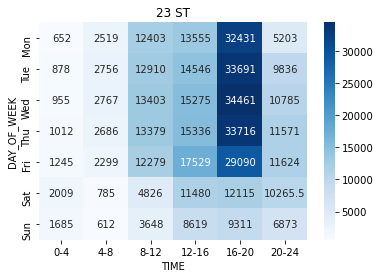

In [71]:
station_23_st = sns.heatmap(heatmap_group_1, cmap='Blues', annot=True, fmt='g', xticklabels=['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'], yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
station_23_st.set_title('23 ST')
plt.savefig('heatmap_23st.jpg')

In [98]:
heatmap_group_2 = stations_hourly_clean[stations_hourly_clean['STATION'] == '34 ST-PENN STA'].groupby(['DAY_OF_WEEK', 'TIME']).HOURLY_ENTRIES.median().unstack()
heatmap_group_3 = stations_hourly_clean[stations_hourly_clean['STATION'] == 'GRD CNTRL-42 ST'].groupby(['DAY_OF_WEEK', 'TIME']).HOURLY_ENTRIES.median().unstack()
heatmap_group_4 = stations_hourly_clean[stations_hourly_clean['STATION'] == '34 ST-HERALD SQ'].groupby(['DAY_OF_WEEK', 'TIME']).HOURLY_ENTRIES.median().unstack()
heatmap_group_5 = stations_hourly_clean[stations_hourly_clean['STATION'] == '42 ST-PORT AUTH'].groupby(['DAY_OF_WEEK', 'TIME']).HOURLY_ENTRIES.median().unstack()
heatmap_group_6 = stations_hourly_clean[stations_hourly_clean['STATION'] == 'TIMES SQ-42 ST'].groupby(['DAY_OF_WEEK', 'TIME']).HOURLY_ENTRIES.median().unstack()
heatmap_group_7 = stations_hourly_clean[stations_hourly_clean['STATION'] == 'CANAL ST'].groupby(['DAY_OF_WEEK', 'TIME']).HOURLY_ENTRIES.median().unstack()

In [73]:
cols_2 = heatmap_group_2.columns.tolist()
cols_2 = cols_2[1:] + cols_2[:1]
heatmap_group_2 = heatmap_group_2[cols_2]

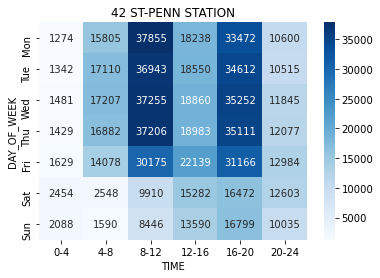

In [74]:
station_penn = sns.heatmap(heatmap_group_2, cmap='Blues', annot=True, fmt='g', xticklabels=['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'], yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
station_penn.set_title('42 ST-PENN STATION')
plt.savefig('heatmap_penn.jpg')

In [75]:
cols_3 = heatmap_group_3.columns.tolist()
cols_3 = cols_3[1:] + cols_3[:1]
heatmap_group_3 = heatmap_group_3[cols_3]

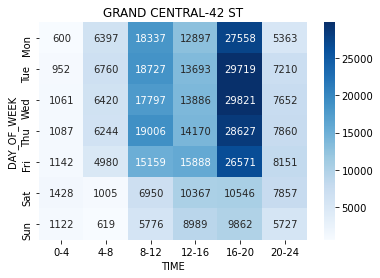

In [76]:
station_grnd_cntrl = sns.heatmap(heatmap_group_3, cmap='Blues', annot=True, fmt='g', xticklabels=['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'], yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
station_grnd_cntrl.set_title('GRAND CENTRAL-42 ST')
plt.savefig('heatmap_gcentral.jpg')

In [77]:
cols_4 = heatmap_group_4.columns.tolist()
cols_4 = cols_4[1:] + cols_4[:1]
heatmap_group_4 = heatmap_group_4[cols_4]

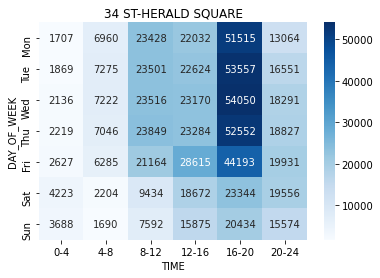

In [78]:
station_34st = sns.heatmap(heatmap_group_4, cmap='Blues', annot=True, fmt='g', xticklabels=['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'], yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
station_34st.set_title('34 ST-HERALD SQUARE')
plt.savefig('example_heatmap_34st.jpg')

In [79]:
cols_5 = heatmap_group_5.columns.tolist()
cols_5 = cols_5[1:] + cols_5[:1]
heatmap_group_5 = heatmap_group_5[cols_5]

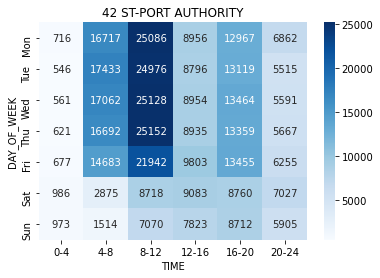

In [80]:
station_port = sns.heatmap(heatmap_group_5, cmap='Blues', annot=True, fmt='g', xticklabels=['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'], yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
station_port.set_title('42 ST-PORT AUTHORITY')
plt.savefig('heatmap_portauth.jpg')

In [81]:
cols_6 = heatmap_group_6.columns.tolist()
cols_6 = cols_6[1:] + cols_6[:1]
heatmap_group_6 = heatmap_group_6[cols_6]

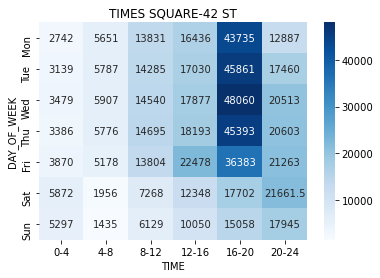

In [82]:
station_times = sns.heatmap(heatmap_group_6, cmap='Blues', annot=True, fmt='g', xticklabels=['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'], yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
station_times.set_title('TIMES SQUARE-42 ST')
plt.savefig('heatmap_timessq.jpg')

In [99]:
heatmap_group_7

TIME,00:00:00,04:00:00,08:00:00,12:00:00,16:00:00,20:00:00
DAY_OF_WEEK,,,,,,
0,1565.0,200.0,469.0,2246.0,4030.0,11184.0
1,2647.0,262.0,526.0,2354.0,4190.0,11541.0
2,2960.0,322.0,541.0,2334.0,4352.0,11836.0
3,3052.0,356.0,542.0,2346.0,4375.0,11798.0
4,3349.0,442.0,452.0,2228.0,5287.0,9882.0
5,2920.5,647.0,246.0,1078.0,2751.0,3386.0
6,2016.0,552.0,186.0,864.0,2144.0,2679.0


In [100]:
cols_7 = heatmap_group_7.columns.tolist()
cols_7 = cols_7[1:] + cols_7[:1]
heatmap_group_7 = heatmap_group_7[cols_7]

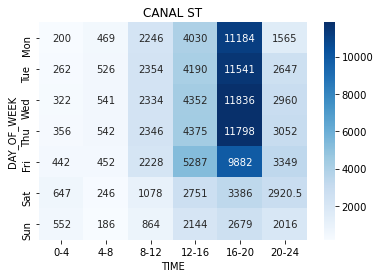

In [101]:
station_unionsq = sns.heatmap(heatmap_group_7, cmap='Blues', annot=True, fmt='g', xticklabels=['0-4', '4-8', '8-12', '12-16', '16-20', '20-24'], yticklabels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
station_unionsq.set_title('CANAL ST')
plt.savefig('heatmap_unionsq.jpg')